/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


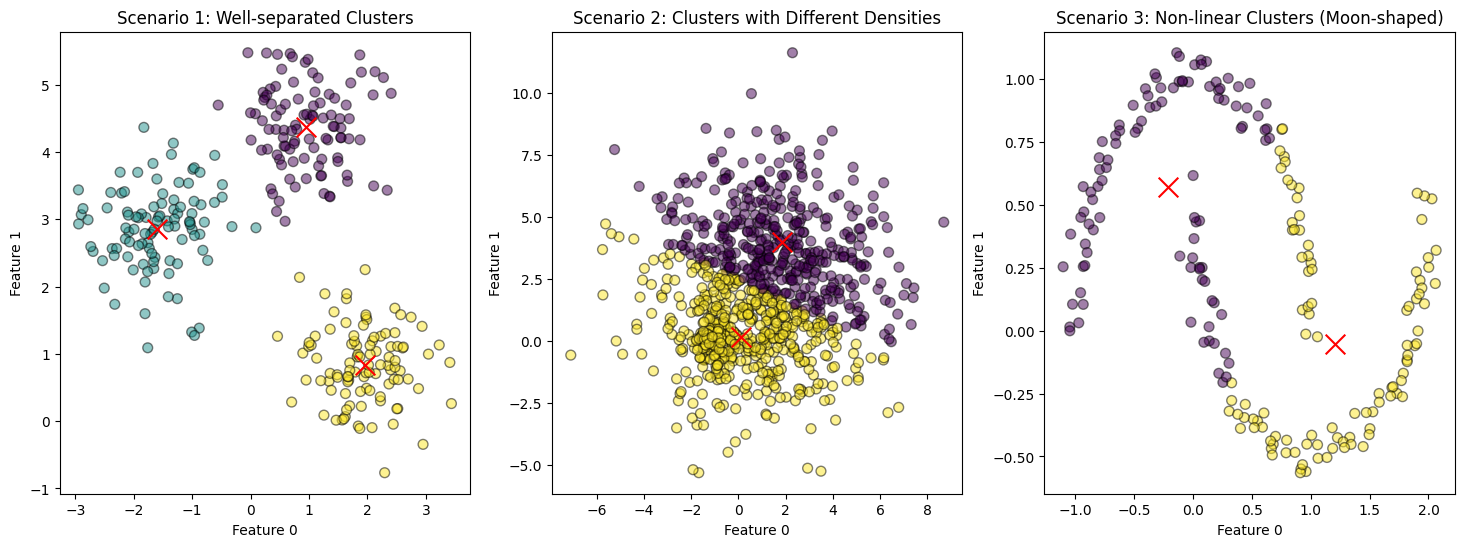

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans

# 데이터 생성
# 시나리오 1: 잘 분리된 동일 밀도 클러스터
X0, y0 = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# 시나리오 2: 다른 밀도의 클러스터
X1, y1 = make_blobs(n_samples=[100, 800], centers=[(-1, 0), (1, 2)], cluster_std=[0.5, 2.5], random_state=42)

# 시나리오 3: 비선형 클러스터 (반달 모양)
X2, y2 = make_moons(n_samples=200, noise=0.05, random_state=42)

# K-means 알고리즘 적용
kmeans0 = KMeans(n_clusters=3, random_state=42).fit(X0)
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(X1)
kmeans2 = KMeans(n_clusters=2, random_state=42).fit(X2)

# 시각화 함수
def plot_clusters(X, y, centroids, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', marker='o', edgecolors='k', alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x')
    plt.title(title)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")

# 그래프 그리기
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plot_clusters(X0, kmeans0.labels_, kmeans0.cluster_centers_, "Scenario 1: Well-separated Clusters")

plt.subplot(1, 3, 2)
plot_clusters(X1, kmeans1.labels_, kmeans1.cluster_centers_, "Scenario 2: Clusters with Different Densities")

plt.subplot(1, 3, 3)
plot_clusters(X2, kmeans2.labels_, kmeans2.cluster_centers_, "Scenario 3: Non-linear Clusters (Moon-shaped)")
plt.show()

In [ ]:
# 필요한 패키지 설치
#pip install yellowbrick
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#샘플 데이터 출력
df=pd.read_csv('Mall_Customers.csv')

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Kmeans를 이용해서 군집을 한 번 만들어 보자!
- 성별, 나이, 수입, 소비
- 피처에 대한 이해도 함께 군집분석을 진행하면 좋다.

In [ ]:
df_sp=df.drop('CustomerID',axis=1)

In [ ]:
# 군집화를 위한 피처를 정리하기
df_sp

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


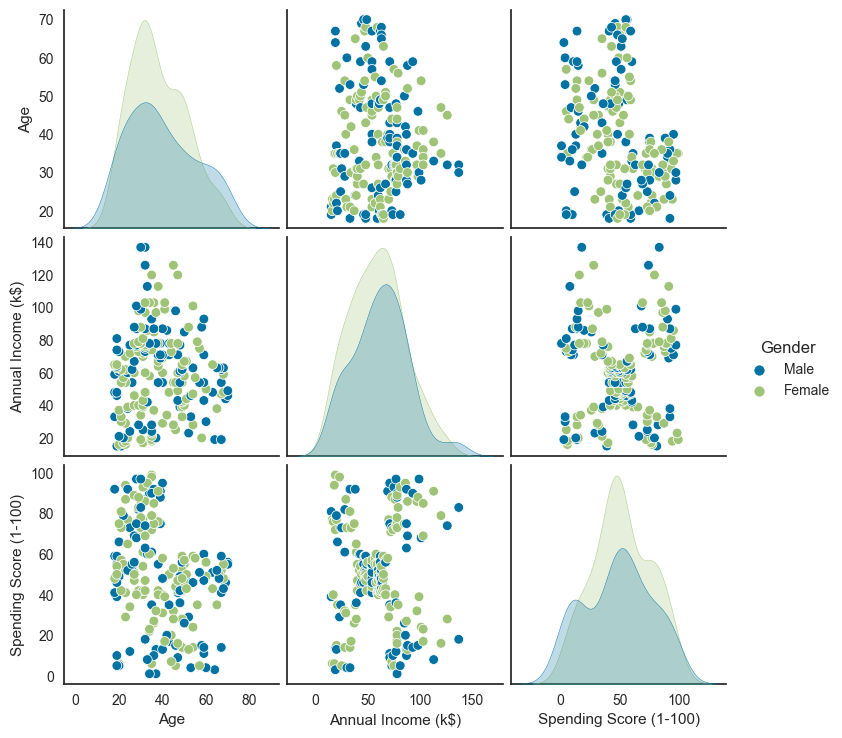

In [ ]:
sns.set_style('ticks')
sns.pairplot(df_sp, hue='Gender')
plt.show()

## 군집화를 하기 전 !
### 스케일링은 필수적으로 해야 한다!

- 스케일링 방법은 데이터 따라 다르게 사용하시면 됩니다. 이상치를 비교해 보고 다양한 데이터 시각화 작업을 진행 후

In [ ]:
#인코딩작업
df_km = pd.get_dummies(df_sp, columns = ['Gender'],drop_first=True)

In [ ]:
#스케일링 불러오기
mns = MinMaxScaler()

df_mns = mns.fit_transform(df_km)

In [ ]:
# 컬럼 합쳐보기

df_mns_sp = pd.DataFrame(data= df_mns, columns = df_km.columns)

#minmax 스케일링 작업 완료
df_mns_sp

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0
...,...,...,...,...
195,0.326923,0.860656,0.795918,0.0
196,0.519231,0.909836,0.275510,0.0
197,0.269231,0.909836,0.744898,1.0
198,0.269231,1.000000,0.173469,1.0


## Kmeans 불러오기!

- init : 초기 중심점을 어떤 식으로 둘 것인가?
- n_cluster : 내가 지정할 클러스터 수
- n_init = 몇번 반복할 것인가? 중심점 이동하면서
- random_state : 무작위값 제어하는 시드값
- max_iter : 알고리즘 수렴 전 최대 몇 번 반복할지

In [ ]:
kmeans_model1 =KMeans(n_clusters = 3, random_state=111) #고객군의 군집을 3개정도만 나눠보자!

In [ ]:
#kmeans 학습은 fit
#스케일링 한 값을 넣는다.
kmeans_model1.fit(df_mns_sp)


/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=111)

In [ ]:
#kmeans 제공하는 함수들
#inertia_ SSE 값 출력
#cluster_centers_ 중심 좌표
# n_iter_ 반복횟수 출력
print(kmeans_model1.inertia_)
print(kmeans_model1.cluster_centers_)
print(kmeans_model1.n_iter_)
print(kmeans_model1.labels_) #내가 kmeans 군집의 레이블을 확인할 수 있다. 인덱스기준으로 나열된 내용들

9.40389112855273
[[ 1.91538462e-01  3.47213115e-01  4.70612245e-01  0.00000000e+00]
 [ 1.39423077e-01  2.15163934e-01  6.11394558e-01  1.00000000e+00]
 [ 3.92307692e-01  5.54098361e-01  1.34183673e-01  1.00000000e+00]
 [ 2.93803419e-01  5.91074681e-01  8.33333333e-01  1.00000000e+00]
 [ 6.95266272e-01  3.21563682e-01  4.89403454e-01  0.00000000e+00]
 [ 1.43491124e-01  8.76418663e-02  8.11616954e-01 -1.66533454e-16]
 [ 4.52662722e-01  9.45775536e-02  2.00941915e-01 -1.66533454e-16]
 [ 2.72893773e-01  5.82357533e-01  8.23129252e-01 -5.55111512e-17]
 [ 4.95879121e-01  6.41686183e-01  2.00437318e-01 -1.11022302e-16]
 [ 7.85502959e-01  2.76166456e-01  3.96389325e-01  1.00000000e+00]]
6
[1 1 6 5 6 5 6 5 9 5 9 5 6 5 2 1 6 1 9 5 1 1 6 1 6 1 6 1 6 5 9 5 9 1 6 5 6
 5 6 5 4 1 9 0 6 5 4 0 0 0 4 1 0 9 4 9 4 9 0 9 9 1 4 4 9 1 4 4 1 0 9 4 4 4
 9 1 4 1 0 4 9 1 9 4 0 9 4 0 0 4 4 1 9 0 0 1 4 0 9 1 0 4 9 1 9 0 4 9 9 9 9
 0 0 1 0 0 4 4 4 4 1 0 0 3 0 7 2 3 9 3 2 3 0 7 2 7 8 3 2 7 8 3 0 7 2 3 2 7
 8 3 2 3 8

## 엘보우 차트를 통해서 군집에 대한 평가를 진행해 보자!

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

<Axes: >

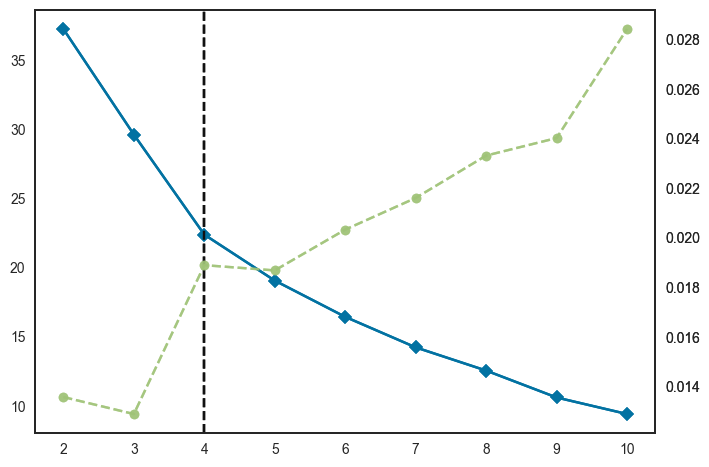

In [ ]:
Elbow_ch =KElbowVisualizer(kmeans_model1)
Elbow_ch.fit(df_mns_sp) #데이터 값 그대로 넣기
Elbow_ch.draw() #엘보우 그래프 그리기

## 실루엣계수를 통해서 간단하게 시각화

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

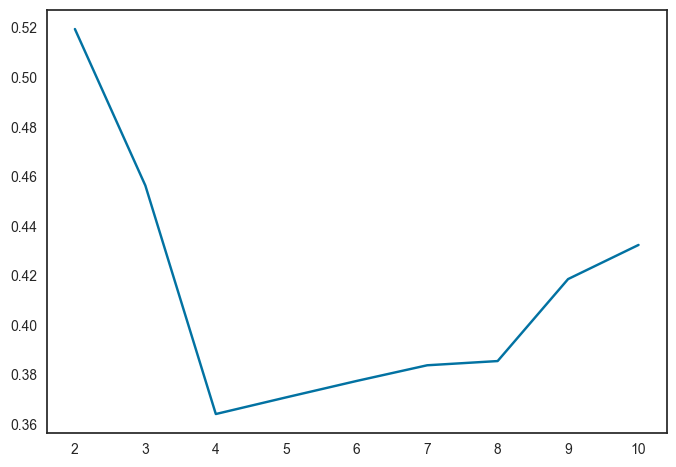

In [ ]:
# 반복문을 통해 실루엣 계수가 어떤 식으로 변화하는지 체크하기
KMeans_model1={'random_state':111}

# 실루엣 계수를 추가하기
# 군집의 수가 변화하면서 어떤 식으로 값이 변화하는지를 같이 살펴보는 것

sil_coef = []

# 실루엣계수의 그래프 생성

for i in range(2,11):
    kmeans_sil = KMeans(n_clusters = i, **KMeans_model1)
    kmeans_sil.fit(df_mns_sp) #데이터 학습
    score = silhouette_score(df_mns_sp, kmeans_sil.labels_)
    sil_coef.append(score)

plt.plot(range(2,11), sil_coef)
plt.xticks(range(2,11))
plt.show()

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

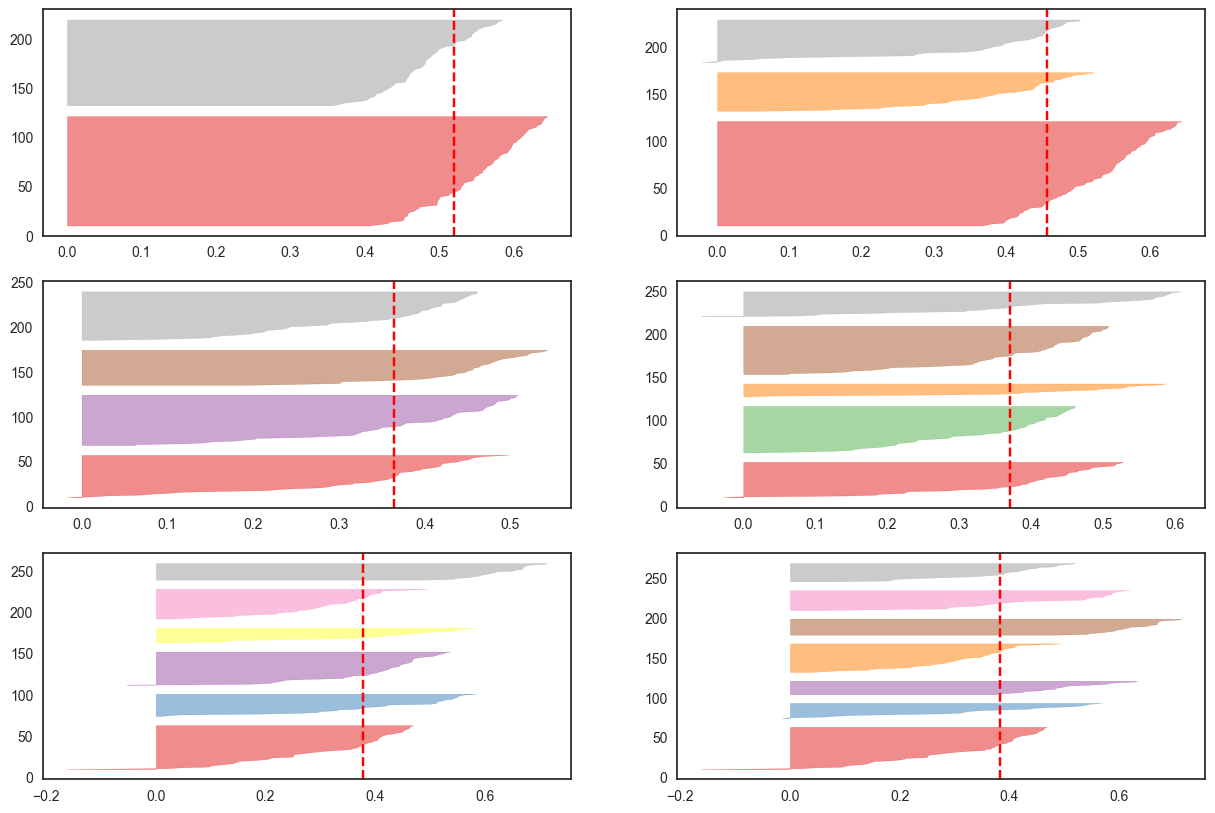

In [ ]:
## 군집별로 같이 시각화를 통해 살펴보자!

fig, ax = plt.subplots(3,2 , figsize=(15,10))

for i in [2,3,4,5,6,7]:
    kmeans_model3 = KMeans(
        n_clusters=i,
        random_state=111 )
    q, mod = divmod(i,2)

# 실루엣계수 시각화를 군집별로 진행

    visual = SilhouetteVisualizer(kmeans_model3,
                                 color = 'yellowbricks',
                                 ax=ax[q-1][mod])

    visual.fit(df_mns_sp) #데이터셋 학습

array([1, 1, 6, 5, 6, 5, 6, 5, 9, 5, 9, 5, 6, 5, 2, 1, 6, 1, 9, 5, 1, 1,
       6, 1, 6, 1, 6, 1, 6, 5, 9, 5, 9, 1, 6, 5, 6, 5, 6, 5, 4, 1, 9, 0,
       6, 5, 4, 0, 0, 0, 4, 1, 0, 9, 4, 9, 4, 9, 0, 9, 9, 1, 4, 4, 9, 1,
       4, 4, 1, 0, 9, 4, 4, 4, 9, 1, 4, 1, 0, 4, 9, 1, 9, 4, 0, 9, 4, 0,
       0, 4, 4, 1, 9, 0, 0, 1, 4, 0, 9, 1, 0, 4, 9, 1, 9, 0, 4, 9, 9, 9,
       9, 0, 0, 1, 0, 0, 4, 4, 4, 4, 1, 0, 0, 3, 0, 7, 2, 3, 9, 3, 2, 3,
       0, 7, 2, 7, 8, 3, 2, 7, 8, 3, 0, 7, 2, 3, 2, 7, 8, 3, 2, 3, 8, 7,
       8, 7, 2, 7, 2, 7, 4, 7, 2, 7, 2, 7, 2, 7, 8, 3, 2, 3, 2, 3, 8, 7,
       2, 3, 2, 3, 8, 7, 2, 7, 8, 3, 8, 3, 8, 7, 8, 7, 2, 7, 8, 7, 8, 3,
       2, 3], dtype=int32)